# Vježba 2 - Predstavljanje multimedijalnog sadržaja

## Grafičko predstavljanje podataka 

Za grafičko predstavljanje podataka u Pythonu se najčešće koristi biblioteka matplotlib i to njen pyplot modul. Iako pyplot nudi mogućnosti crtanja različitih tipova grafika na ovom predmetu će nam najznačajnija biti funkcija plot.

In [1]:
#Naredba koja definiše inline crtanje grafika u Notebook-u
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.array([1, 7, 5, 4.3, 2, 9, 11, 8.8])

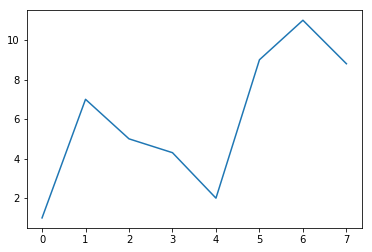

In [3]:
#Iscrtava elemente niza u funkciji njihovog indeksa i linijski ih povezuje
plt.plot(x)

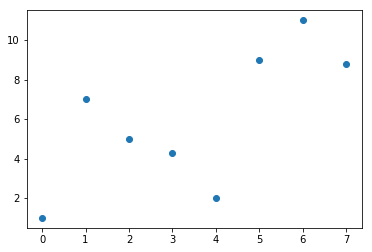

In [4]:
# Iscrtava kružiće koji nisu linijski povezani
plt.plot(x, 'o')

Ukoliko je potrebno iscrtati funkciju $x^2$ na intervalu $[-2, 2]$ to je moguće uraditi na sledeći način.

In [5]:
x = np.arange(-2, 2, 0.01)
y = x ** 2

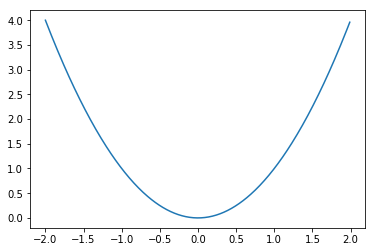

In [6]:
plt.plot(x, y)

Crtanje više grafika na jednoj figuri je moguće uzastopnim pozivanjem funkcije plot. Dodavanje naslova, oznaka osa i legende je lako moguće korištenjem odgovarajućih funkcija.

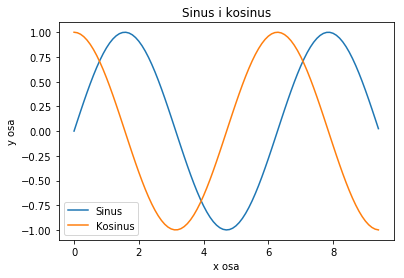

In [7]:
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x osa')
plt.ylabel('y osa')
plt.title('Sinus i kosinus')
plt.legend(['Sinus', 'Kosinus'])

Ukoliko je na jednoj figuri potrebno prikazati više grafika ali ne jedan preko drugog nego jedan do drugog, tada je moguće koristiti subplot funkciju.

Text(0.5,1,'Kosinus')

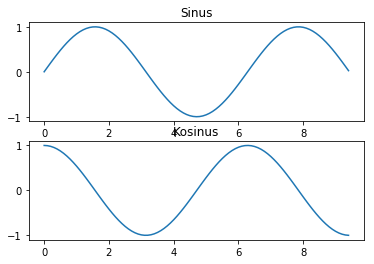

In [8]:
# Kreiranje subplot grida visine 2 i širine 1, te postavljanje aktivnosti na prvi subplot.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sinus')

# Postavljanje aktivnosti na drugi subplot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Kosinus')

Za dodatne informacije o <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html">plot</a> i <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot">subplot</a> funkcijama pogledati odgovarajuće linkove na dokmentaciju.

## Predstavljanje teksta 

Za predstavljanje tekstualnog sadržaja u Python-u se koriste stringovi dok je čitanje i pisanje teksta u fajl moguće korištenjem funkcije open za otvaranje fajla i funkcije read/write za čitanje/pisanje.

In [9]:
# Učitavanje teksta i fajla some_text.txt u string text. Funkcija open vrši otvranje fajla. Ukoliko se ne koristi
# sa ključnom riječi with onda je potrebno na kraju izvršiti i zatvaranje, dok se sa ključnom riječi with vrši automatsko
# zatvaranje kada se izađe iz opsega ključne riječi with.
text = ''
with open('some_text.txt', 'r') as f:
    text = f.read()
    
print(text)

                     THE THREE WISHES

   Once upon a time . . . a woodcutter lived happily with his wife in a pretty
little log cabin in the middle of a thick forest. Each morning he set off 
singing to work, and when he came home in the evening, a plate of hot steaming 
soup was always waiting for him. 
   One day, however, he had a strange surprise. He came upon a big fir tree 
with strange open holes on the trunk. It looked somehow different from the 
other trees, and just as he was about to chop it down, the alarmed face of an 
elf popped out of a hole.
   "What's all this banging?" asked the elf. "You're not thinking of cutting 
down this tree, are you? It's my home. I live here!" The woodcutter dropped 
his axe in astonlshment.
   "Well, I . . ." he stammered.
   "With all the other trees there are in this forest, you have to pick this 
one. Lucky I was in, or I would have found myself homeless."
   Taken aback at these words, the woodcutter qulckly recovered, for after all
the 

In [10]:
# Sada ćemo sav tekst prebaciti u mala slova i upisati u fajl small_text.txt
small_text = text.lower()

with open('small_text.txt', 'w') as f:
    f.write(small_text)

## Predstavljanje zvučnih signala 

Za učitavanje, predstavljanje i upisivanje zvučnih signala u Python-u postoji veliki broj opcija. Međutim najčešće se zvučni signali predstavljaju korištenjem Numpy nizova, dok se zavisno od formata fajlova koriste različite biblioteke za čitanje i pisanje.

Za čitanje i pisnaje wav fajla iskoristićemo scipy.io koji sadrži modul wavfile sa funkcijama read i write.
Funkcije read na izlazu daje tuple (fs, data), gdje fs predstavlja frekvenciju odmjeravanja, a data sam niz koji predstavlja podatke. Broj bita korištenih za kodovanje je moguće odrediti posmatranjem tipa podataka unutar niza.

In [2]:
from scipy.io import wavfile

fs, data = wavfile.read('handel44100.wav')

Najjednostavniji način za reprodukciju zvuka je korištenjem biblioteke sounddevice i njene funkcije play. Funkcija kao ulaz prima dva parametra data i fs, gdje data predstavlja podatke koji se reprodukuju, a fs frekvenciju odmjeravanja kojom se reprodukuje signal. Postoji i opcioni argument blocking koji kada je postavljen na True blokira dalje izvršavanje koda dok ne završi reprodukcija zvuka.

In [3]:
import sounddevice as sd
sd.play(data, fs, blocking=True)

Za upisivanje wav fajla se koristi funkcija write koja kao argumente prima putanju do fajla, fs i podatke.

In [13]:
wavfile.write('handel_copy.wav', fs, data)

### Zadaci

<ol>
<li> Učitati zvučni signal iz fajla handel44100.wav. Kakvom strukturom podataka je zvučni signal predstavljen u memoriji? Kolika je frekvencija odmjeravanja ovog signala i sa koliko bita je kodovan svaki odmjerak signala? Kolike su dimenzije vektora u kojem su odmjerci signala i koliko memorije zauzima? Koliko je trajanje signala u sekundama? Nacrtati signal korištenjem naredbe plot, kao da se radi o analognom signalu. Na apscisi označiti vrijeme u sekundama. Obrati pažnju na to da je signal stereo i da plot crta oba kanala jedan preko drugog! Nacrtati pojedinačne kanale pomoću subplot!
</li>
</ol>

In [3]:
### KOD ZA ZADATAK 1
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

fs, data = wavfile.read('handel44100.wav')
print(data.shape)

print(fs)

print(data.dtype)

size = len(data)*16*2
print(size) ##broj bita
print(size/8)

#trajanje signala u sekundama
t = len(data)/fs
print(t)

print(data)

plt.figure()
time = np.arange(0, t, 1/fs)
plt.subplot(2,1,1)
plt.xlabel('time(s)')
plt.plot(time, data[:,0])

plt.subplot(2,1,2)
plt.xlabel('time(s)')
plt.plot(time, data[:, 1])

(485100, 2)
44100
int16
15523200
1940400.0
11.0
[[ -212 -2346]
 [   45 -2326]
 [  380 -2156]
 ...
 [  218  1168]
 [   86  1034]
 [   -5   933]]


<ol start = "2">
<li> Reprodukovati zvučni signal iz tačke 1. Zašto je prilikom reprodukcije zvučnog signala potrebno zadati frekvenciju odmjeravanja? Šta bi se desilo ako biste koristili nižu ili višu frekvenciju odmjeravanja? Pokušajte upotrebiti npr. 22050Hz ili 88200Hz. Komentarisati rezultate.
</li>
</ol>

In [4]:
### KOD ZA ZADATAK 2
import sounddevice as sd

sd.play(data, fs)

#niza frekvencija odmjeravanja
sd.play(data, 22050)

#visa
sd.play(data, 88200)

<ol start = "3">
<li> Učitati i reprodukovati zvučne signale u fajlovima handel22050.wav i handel11025.wav. Uporediti kvalitetu reprodukcije ova tri signala i komentarisati razlike. U kakvoj vezi je frekvencija odmjeravanja signala sa razlikom u kvaliteti?
</li>
</ol>

In [16]:
### KOD ZA ZADATAK 3


<ol start = "4">
<li> U sljedećim tačkama radićemo sa zvučnim signalom iz tačke 1 (handel44100.wav). Reprodukovati dati zvučni signal unazad.
</li>
</ol>

In [5]:
### KOD ZA ZADATAK 4

sd.play(data[::-1], fs)

<ol start = "5">
<li> Vrijednosti odmjeraka signala vezane su za intenzitet zvučnog signala. Na primjer, množenjem signala nekom konstantom dobija se njegovo pojačanje (ili slabljenje). Generišite novi signal koji je pojačan 2 puta u odnosu na signal iz tačke 1. Obratite pažnju na to da će ukoliko amplituda signala pređe vrijednost definisane tipom podatka doći do njegovog odsijecanja. Reprodukujte dobijeni signal.
</li>
</ol>

In [6]:
### KOD ZA ZADATAK 5
amp_data = data*2;
sd.play(amp_data, fs)

<ol start = "6">
<li> Generišite vektor odmjeraka eksponencijalnog signala $x(t) = e^{-t/T}$, iste dužine kao dati zvučni signal. Vremenska promjenljiva t treba da uzima vrijednosti sa korakom $1/Fs$, gdje je Fs frekvencija odmjeravanja zvučnog signala. Pomnožite ga sa datim signalom i poslušajte rezultat. Zadatak ponovite za vrijednosti $T \in \{1,2,3\}$ sekunde. Komentarisati dobijene rezultate. Na ovaj način se dobija fade-out efekat.
</li>
</ol>

In [7]:
### KOD ZA ZADATAK 6
exp_f = np.exp(-time/3)
newSig = data[:, 0]*exp_f
sd.play(newSig, fs)

<ol start = "7">
<li> Sačuvati jedan od rezultata iz prethodne tačke kao novi WAV fajl.
</li>
</ol>

In [8]:
### KOD ZA ZADATAK 7

wavfile.write('novi.wav', fs, amp_data)


## Predstavljanje slike

Slike se u Python-u predstavljaju korištenjem Numpy nizova reda 2 i većeg. Za čitanje, pisanje i obradu slika se mogu koristiti mnoge biblioteke. U sklopu ove vježbe ćemo koristiti biblioteku pod nazivom skimage za rad sa slikama. Iako je openCV možda i najpoznatija biblioteka za rad sa slikom i videom nećemo je koristiti jer je nešto kompleksnija za korištenje.

Funkcije za čitanje i pisanje slika na disk se nalaze u modulu io biblioteke skimage. Za dodatne pojedinosti biblioteke pogledati <a href="http://scikit-image.org/docs/stable/api/api.html">dokumentaciju</a>.

In [21]:
from skimage.io import imread, imshow, imsave

In [22]:
# Učitavanje slike
lena = imread('LenaRGB.tif')

C:\Users\Vladan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


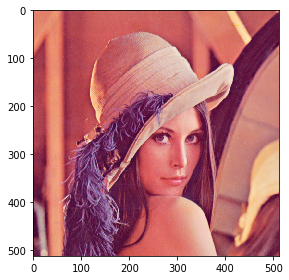

In [23]:
# Prikaz slike
imshow(lena)

In [24]:
# Upisivanje slike
imsave('lena_copy.jpg', lena)

### Zadaci

<ol start = "1">
<li> Učitajte sliku LenaRGB.tif korišćenjem funkcije imread. Kakvom strukturom podataka je slika predstavljena u memoriji? Kolike su dimenzije dobijene matrice? Pogledajte vrijednosti elemenata matrice dobijene na taj način. Kojem opsegu pripadaju
njihove vrijednosti? Kom tipu podataka pripadaju?
</li>
</ol>

In [25]:
### KOD ZA ZADATAK 1

<ol start = "2">
<li> Prikžite sliku korištenjem funkcije imshow.
</li>
</ol>

In [26]:
### KOD ZA ZADATAK 2

<ol start = "3">
<li> Pojedine komponente RGB slike moguće je izdvojiti i obrađivati kao zasebne intenzitetske slike. Neka se npr. RGB slika nalazi u matrici `a`. Sada je R komponentu moguće izdvojiti korištenjem `a[:, :, 0]` itd. Izdvojiti i prikazati u sve tri komponente slike LenaRGB.tif kao grayscale slike u posebnim prozorima.
</li>
</ol>

In [27]:
### KOD ZA ZADATAK 3

<ol start = "4">
<li> Ukoliko želite da prikažete RGB sliku koja sadrži samo jednu od komponenata slike, kreirajte novu sliku u kojoj ćete ostale dvije komponente postaviti na nulu. Prikazati na ovaj način sve tri komponente slike LenaRGB.tif.
</li>
</ol>

In [28]:
### KOD ZA ZADATAK 4

<ol start = "5">
<li> Funkcijom rgb2gray iz modula color biblioteke skimage se RGB slika može konvertovati u grayscale sliku. Primijenite ovu funkciju na matricu slike LenaRGB.tif i rezultat sačuvajte u novoj matrici. Prikažite rezultat. Koje su dimenzije nove matrice. Objasnite razliku u odnosu na dimenzije matrice originalne slike. 
</li>
</ol>

In [29]:
### KOD ZA ZADATAK 5

<ol start = "6">
<li> Invertovati grayscale sliku iz prethodne tačke i prikazati rezultat. 
</li>
</ol>

In [30]:
### KOD ZA ZADATAK 6

<ol start = "7">
<li> Sačuvati sliku iz prethodne tačke u JPEG formatu. Obratiti pažnju na parametar quality.
</li>
</ol>

In [31]:
### KOD ZA ZADATAK 7

## Predstavljanje videa 

Video se u Python-u predstavlja kao Numpy niz reda 3 i više. Za čitanje i pisanje videa na fajl sistem ćemo u sklopu ove vježbe iskoristiti biblioteku skvideo i njen modul io. U sklopu ovog modula nalaze se funkcije vread i vwrite koje omogućavaju čitanje i pisanje. Iskoristićemo i funkciju ffprobe koja omogućava dobijanje metapodataka za traženi video. Za dodatne informacije o biblioteci podgledati <a href="http://www.scikit-video.org/stable/classes.html">dokumentaciju</a>.

In [37]:
from skvideo.io import vread, vwrite, ffprobe, FFmpegReader

In [38]:
# Prikayivanje meta podataka o videu

d = ffprobe('saobracaj.avi')

print(d)

{'video': OrderedDict([('@index', '0'), ('@codec_name', 'rawvideo'), ('@codec_long_name', 'raw video'), ('@codec_type', 'video'), ('@codec_time_base', '1/15'), ('@codec_tag_string', '[0][0][0][0]'), ('@codec_tag', '0x0000'), ('@width', '160'), ('@height', '120'), ('@coded_width', '160'), ('@coded_height', '120'), ('@has_b_frames', '0'), ('@sample_aspect_ratio', '0:1'), ('@display_aspect_ratio', '0:1'), ('@pix_fmt', 'bgr24'), ('@level', '-99'), ('@refs', '1'), ('@r_frame_rate', '15/1'), ('@avg_frame_rate', '15/1'), ('@time_base', '1/15'), ('@start_pts', '0'), ('@start_time', '0.000000'), ('@duration_ts', '151'), ('@duration', '10.066667'), ('@bit_rate', '6958080'), ('@nb_frames', '151'), ('disposition', OrderedDict([('@default', '0'), ('@dub', '0'), ('@original', '0'), ('@comment', '0'), ('@lyrics', '0'), ('@karaoke', '0'), ('@forced', '0'), ('@hearing_impaired', '0'), ('@visual_impaired', '0'), ('@clean_effects', '0'), ('@attached_pic', '0')]))])}


In [39]:
# Učitavanje videa u numpy niz, prva dimenzija predstavlja broj frejmova,
# druga i treća visinu i širinu, dok treća predstavlja broj kanala za predstavljanje jednog frejma.

video = vread('saobracaj.avi')
print(video.shape)

(151, 120, 160, 3)


In [40]:
# Upisivanje numpy niza kao video

vwrite('saobracaj_copy.avi', video)

Često kompletan video i nije moguće učitati u niz, pa se modul io sadrži i klase FFmpegReader i FFmpegWriter koje omogućavaju čitanje i pisanje frejm po frejm. Primjer učitavanja frejm po frejm je dat u narednom kodu.

In [41]:
# Učitavanje video i upis u numpy niz
reader = FFmpegReader('saobracaj.avi')

# Video se učitava frejm po frejm i čuva u nizu video
for frame in reader.nextFrame():
    print (frame.shape)

(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 160, 3)
(120, 

### Zadaci

<ol start = "1">
<li> Pomoću funkcije ffprobe ispitati osnovne karakteristike video klipa mobile.avi. Učitati video mobile.avi. Kojom strukturom podataka je video predstavljen u memoriji?
</li>
</ol>

In [42]:
### KOD ZA ZADATAK 1

<ol start = "2">
<li> Kreirati negativ videa.
</li>
</ol>

In [43]:
### KOD ZA ZADATAK 2

<ol start = "3">
<li> Sačuvati video iz prethodne tačke kao novi AVI fajl.
</li>
</ol>

In [44]:
### KOD ZA ZADATAK 3